In [141]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf',
 '/System/Library/Fonts/Supplemental/Raanana.ttc',
 '/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf',
 '/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Beirut.ttc',
 '/System/Library/Fonts/Supplemental/STIXVar.otf',
 '/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Courier New.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf',
 '/Users/ijung-yun/Library/Fonts/NotoSansMonoCJKkr-Regular.otf',
 '/System/Library/Fonts/Supplemental/STIXIntDReg.otf',
 '/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansCaucasianAlbanian-Regular.ttf',
 '/System/Library/Fonts/SFNSMono.ttf',
 '/System/Library/Fonts/Supplemental/N

In [142]:
from matplotlib import font_manager, rc
font_path = '/Users/ijung-yun/Library/Fonts/뫼비우스 Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

데이터 로드

In [144]:
df = pd.read_csv('../Dataset/편의시설 변경 버전.csv', index_col=0)

In [145]:
df.head()

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,0.0,0.0
1,신교동,0,0,0,0,0,0,2,0,1,...,1,0,0,1,0,0,1,11,0.0,0.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0.0,0.0
3,효자동,0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,16,0.0,0.0
4,창성동,0,2,2,0,0,0,0,0,0,...,3,0,0,0,0,0,0,23,0.0,0.0


데이터 전처리

In [146]:
df.columns

Index(['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '장보기시설', '쇼핑시설'],
      dtype='object')

In [147]:
df['의료'] = df['병원'] + df['의원'] + df['약국']
df['치안'] = df['치안센터'] + df['경찰서'] + df['119안전센터']
df['생횔편의시설'] = df['목욕장업'] + df['세탁업'] + df['제과점영업']
df['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관']
df['교통'] = df['지하철역'] + df['버스정류소']
df 

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,노래방수,당구장,음식점수,장보기시설,쇼핑시설,의료,치안,생횔편의시설,여가,교통
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,16,0.0,0.0,0,0,0,0,7
1,신교동,0,0,0,0,0,0,2,0,1,...,0,1,11,0.0,0.0,1,1,3,1,0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,4,0.0,0.0,0,1,0,0,1
3,효자동,0,2,1,0,0,0,0,0,1,...,0,0,16,0.0,0.0,0,0,1,0,2
4,창성동,0,2,2,0,0,0,0,0,0,...,0,0,23,0.0,0.0,4,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,2,9,0,8,...,15,5,190,0.0,0.0,34,2,19,34,40
461,암사동,1,29,3,8,3,2,23,0,22,...,29,12,422,4.0,0.0,92,3,48,65,30
462,성내동,1,54,3,14,4,4,35,19,34,...,60,25,994,3.0,2.0,170,3,73,148,55
463,천호동,3,51,3,7,3,5,47,6,37,...,44,22,1024,3.0,3.0,205,4,87,93,54


In [148]:
df.columns

Index(['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '장보기시설', '쇼핑시설', '의료', '치안', '생횔편의시설',
       '여가', '교통'],
      dtype='object')

In [149]:
df['공원수'].value_counts()

0     271
1      83
2      39
3      20
4      20
6      10
5       8
7       5
8       3
9       2
11      2
10      1
12      1
Name: 공원수, dtype: int64

In [150]:
df.drop(['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
        '노래방수', '당구장'], axis=1, inplace=True)
df.columns

Index(['석유판매업', '공원수', '음식점수', '장보기시설', '쇼핑시설', '의료', '치안', '생횔편의시설', '여가',
       '교통'],
      dtype='object')

In [151]:
#df.drop([ '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '세탁업',
#       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
#        '노래방수', '당구장'], axis=1, inplace=True)
df.to_csv('편의시설_컬럼10개.csv')

In [152]:
df['치안'].value_counts()

0     228
1     121
2      48
3      32
4      11
7       7
6       7
5       6
10      2
8       2
11      1
Name: 치안, dtype: int64

In [153]:
df.isna().sum()

석유판매업     0
공원수       0
음식점수      0
장보기시설     0
쇼핑시설      0
의료        0
치안        0
생횔편의시설    0
여가        0
교통        0
dtype: int64

In [154]:
df.describe()

,석유판매업,공원수,음식점수,장보기시설,쇼핑시설,의료,치안,생횔편의시설,여가,교통
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.382796,1.122581,268.623656,0.608602,0.843011,42.230108,1.129032,18.731183,30.021505,24.533333
std,2.389751,1.968509,420.502289,1.204129,1.854363,84.166225,1.723480,29.817888,53.893609,36.636369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000
50%,0.000000,0.000000,102.000000,0.000000,0.000000,11.000000,1.000000,5.000000,7.000000,8.000000
75%,2.000000,1.000000,318.000000,1.000000,1.000000,46.000000,1.000000,24.000000,31.000000,34.000000
max,22.000000,12.000000,3089.000000,9.000000,18.000000,805.000000,11.000000,206.000000,359.000000,274.000000


In [155]:
df['음식점수'].value_counts(ascending=False)

29      7
25      7
55      7
19      6
50      6
       ..
517     1
336     1
13      1
72      1
1024    1
Name: 음식점수, Length: 286, dtype: int64

In [128]:
df_x = pd.DataFrame()
for i in ['음식점수','의료', '생횔편의시설', '여가', '교통']:
    df_x[i] = pd.qcut(df[i], 4, labels=[0, 1, 2, 3])
    df_x[i] = df_x[i].astype('int64')
for i in ['치안','쇼핑시설']:
    df_x[i] = np.digitize(df[i], [1,2])
for i in ['공원수','장보기시설','석유판매업']:
    df_x[i] = np.digitize(df[i], [1])
df_x['석유판매업'].value_counts()

0    253
1    212
Name: 석유판매업, dtype: int64

In [52]:
df_x.isna().sum()

음식점수      0
의료        0
생횔편의시설    0
여가        0
교통        0
치안        0
쇼핑시설      0
공원수       0
장보기시설     0
석유판매업     0
dtype: int64

In [53]:
df_x.describe()

,음식점수,의료,생횔편의시설,여가,교통,치안,쇼핑시설,공원수,장보기시설,석유판매업
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.492473,1.479570,1.391398,1.408602,1.406452,0.759140,0.511828,0.417204,0.298925,0.455914
std,1.122097,1.123856,1.180632,1.161863,1.176440,0.826584,0.782603,0.493628,0.458280,0.498589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [54]:
df_x.columns

Index(['음식점수', '의료', '생횔편의시설', '여가', '교통', '치안', '쇼핑시설', '공원수', '장보기시설',
       '석유판매업'],
      dtype='object')

In [55]:
corr = df_x.corr()

<AxesSubplot:>

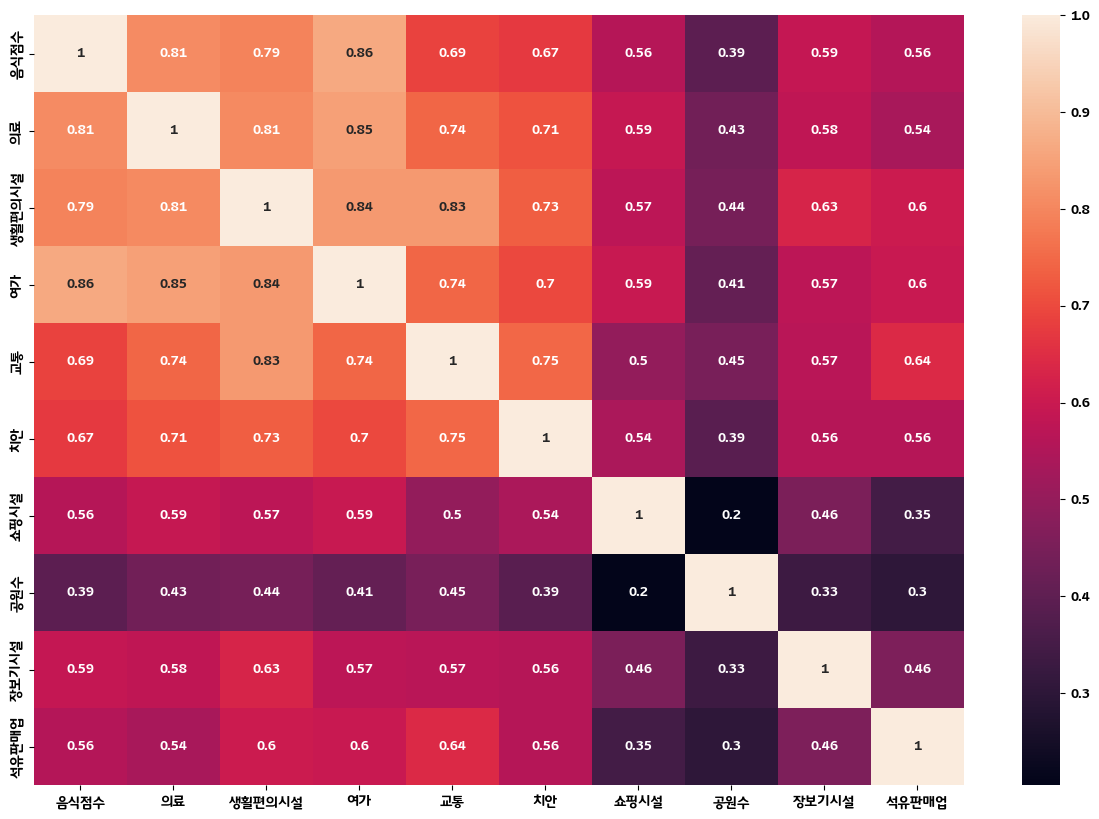

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = StandardScaler().fit_transform(df_x)

In [58]:
pd.DataFrame(data_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.33,-1.32,-1.18,-1.21,-1.20,-0.92,-0.65,-0.85,-0.65,-0.92
25%,-1.33,-1.32,-1.18,-1.21,-1.20,-0.92,-0.65,-0.85,-0.65,-0.92
50%,-0.44,-0.43,-0.33,-0.35,-0.35,0.29,-0.65,-0.85,-0.65,-0.92
75%,0.45,0.46,0.52,0.51,0.51,0.29,0.62,1.18,1.53,1.09
max,1.34,1.35,1.36,1.37,1.36,1.50,1.90,1.18,1.53,1.09


In [59]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=3)
pc = pca.fit_transform(data_scaled)

In [117]:
pcd = pd.DataFrame(pc)
pcd

,0,1,2
0,-2.995638,0.164443,-0.154198
1,-2.582918,0.283355,-0.090897
2,-2.890350,0.279901,-0.069464
3,-3.288981,0.248224,0.012971
4,-2.974306,0.296944,0.135674
...,...,...,...
460,2.148148,-1.368676,-0.900551
461,3.402459,-1.054067,-0.501503
462,3.957273,1.841553,-0.259061
463,3.957273,1.841553,-0.259061


In [118]:
pcd.sort_values(1, ascending=False), pcd.sort_values(0, ascending=False)

(            0         1         2
 73   2.493191  2.036497  1.375997
 459  3.403090  2.027099  1.220976
 151  1.087910  2.008205  1.585332
 339  1.787777  1.976471  1.421253
 113 -0.039782  1.941554  1.560890
 ..        ...       ...       ...
 82   0.417447 -1.631053 -0.951817
 308 -2.287507 -1.638587  0.488540
 14  -0.715928 -1.642153 -0.980501
 83  -0.808818 -1.737847 -0.974512
 357 -0.936061 -1.760780 -1.156366
 
 [465 rows x 3 columns],
             0         1         2
 372  4.372061  0.122304  0.550846
 417  4.372061  0.122304  0.550846
 148  4.372061  0.122304  0.550846
 435  4.372061  0.122304  0.550846
 433  4.372061  0.122304  0.550846
 ..        ...       ...       ...
 44  -3.288981  0.248224  0.012971
 43  -3.288981  0.248224  0.012971
 42  -3.288981  0.248224  0.012971
 38  -3.288981  0.248224  0.012971
 126 -3.288981  0.248224  0.012971
 
 [465 rows x 3 columns])

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


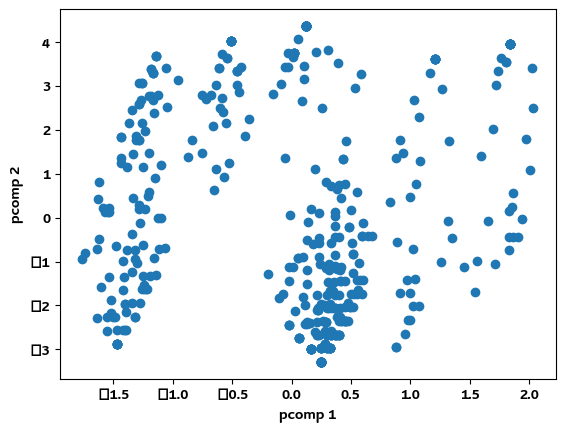

In [119]:
plt.figure()
plt.scatter(pcd[1],pcd[0],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

<Figure size 640x480 with 0 Axes>

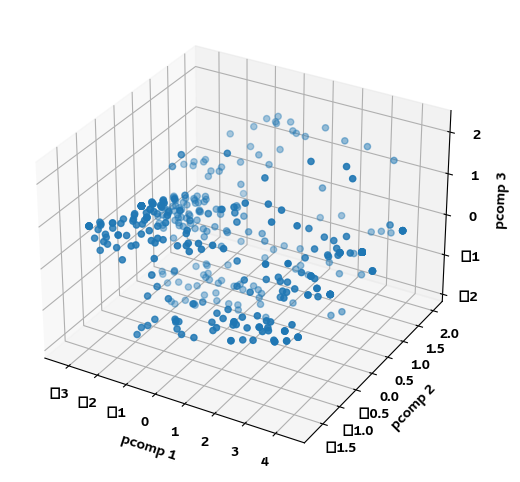

In [120]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2])

### DBSCAN

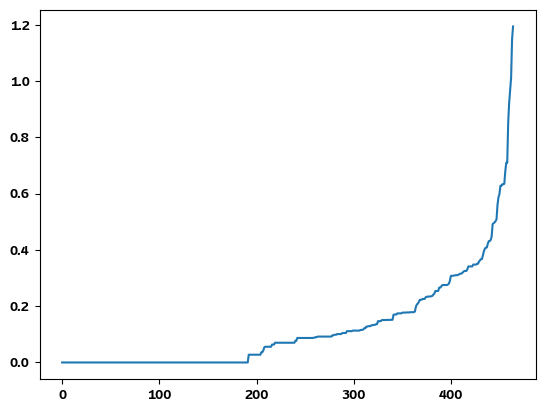

In [121]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pc)
distances, indices = neighbors_fit.kneighbors(pc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

학습하기

In [114]:
from sklearn.cluster import DBSCAN

In [122]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=0.6, min_samples=4)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts()

dbscan2_label
 0               176
 2               123
 3                59
 1                56
-1                27
 4                24
dtype: int64

In [123]:
dbscan.feature_names_in_

AttributeError: 'DBSCAN' object has no attribute 'feature_names_in_'

In [124]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(pc, dbscan_data)

0.34172049299524204

In [125]:
pcd['cluster_id'] = db_pred
pcd

,0,1,2,cluster_id
0,-2.995638,0.164443,-0.154198,0
1,-2.582918,0.283355,-0.090897,0
2,-2.890350,0.279901,-0.069464,0
3,-3.288981,0.248224,0.012971,0
4,-2.974306,0.296944,0.135674,0
...,...,...,...,...
460,2.148148,-1.368676,-0.900551,2
461,3.402459,-1.054067,-0.501503,2
462,3.957273,1.841553,-0.259061,4
463,3.957273,1.841553,-0.259061,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


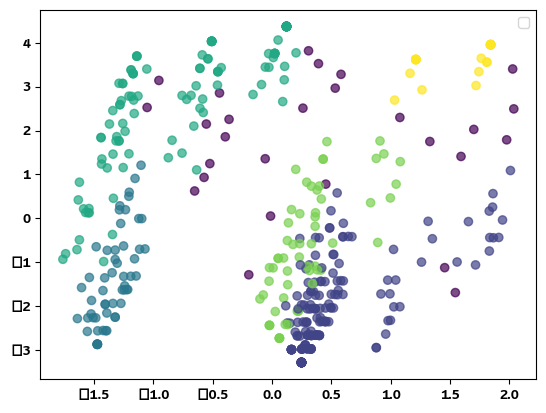

In [126]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

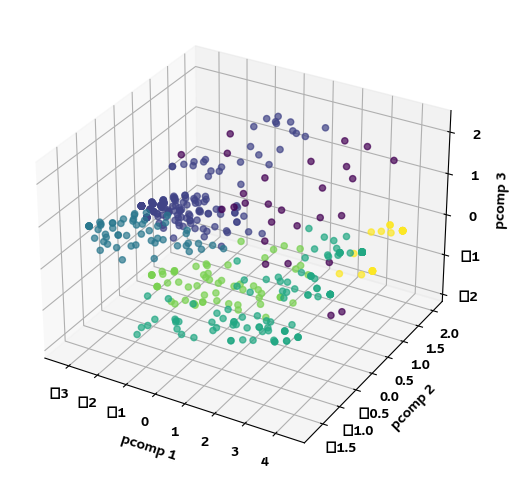

In [127]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'], alpha=0.7)

### HDBSCAN 활용하기

In [101]:
!pip install hdbscan
import hdbscan

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


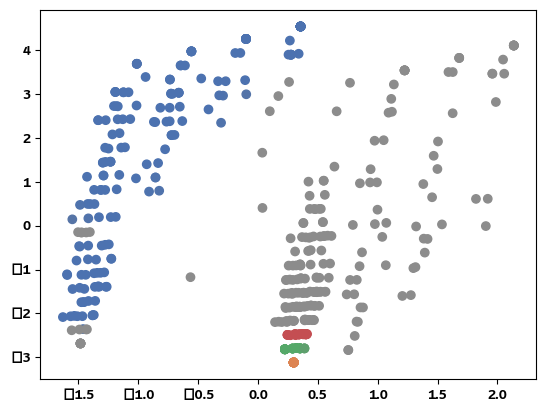

In [111]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, prediction_data=True).fit(pc)
pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter( pcd[1],pcd[0], c=colors)

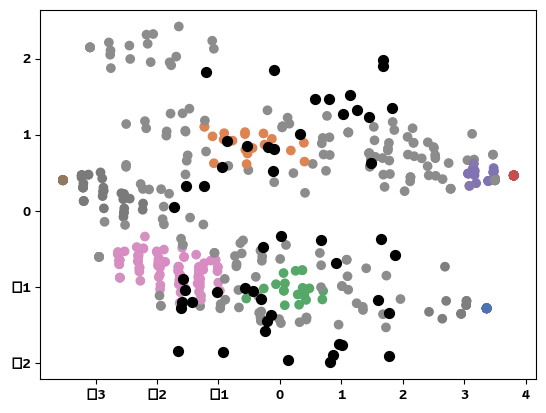

In [981]:
test_points = (np.random.random(size=(50, 2))-0.5)*4

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(pcd[0], pcd[1], c=colors);
plt.scatter(*test_points.T, c='k', s=50)

In [982]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
test_labels

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1, -1,
       -1,  2, -1,  1,  6, -1, -1, -1,  1, -1, -1, -1,  6, -1, -1, -1, -1,
        6, -1, -1, -1,  1, -1, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


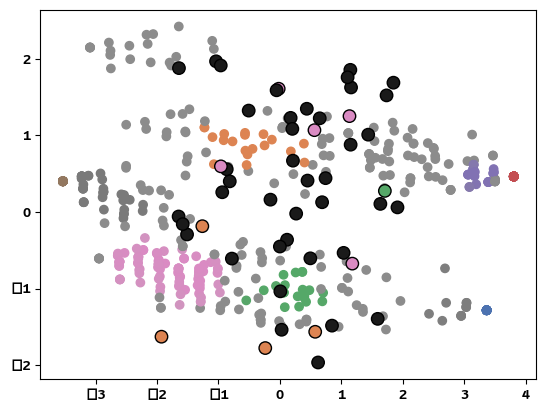

In [983]:
test_points = (np.random.random(size=(50, 2))-0.5)*4

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(pcd[0], pcd[1], c=colors, **);
plt.scatter(*test_points.T, c=test_colors, s=80, linewidths=1, edgecolors='k')

In [946]:
hdbs = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
hdbs.fit(pc)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=15)

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/hdbscan/plots.py:837: RuntimeWarning: divide by zero encountered in true_divide
  line_width = edge_linewidth * (np.log(self._mst.T[2].max() / self._mst.T[2]) + 1.0)
/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/lines.py:64: RuntimeWarning: invalid value encountered in double_scalars
  scaled_offset = offset * lw


<AxesSubplot:>

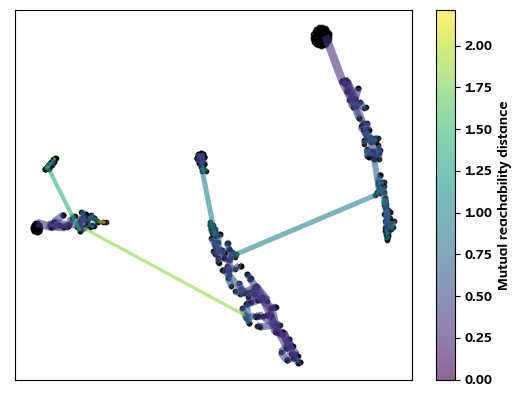

In [947]:
hdbs.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=10, 
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

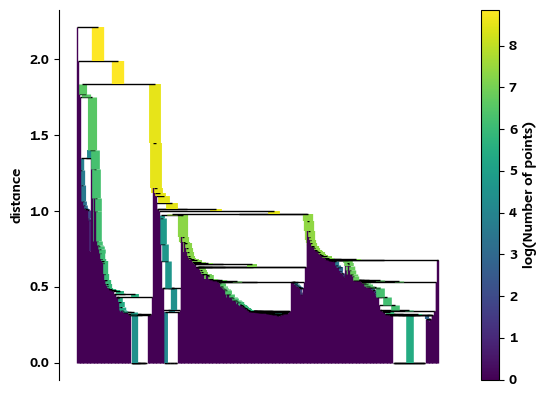

In [948]:
hdbs.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

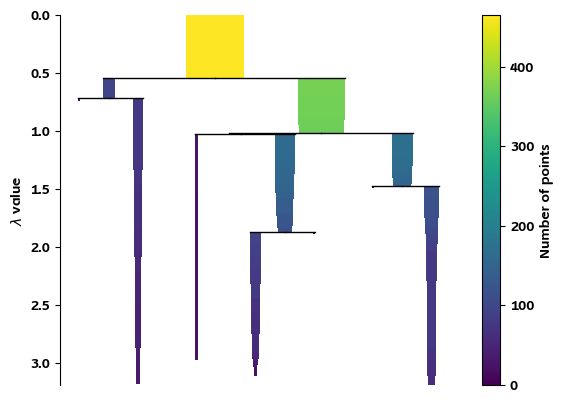

In [949]:
hdbs.condensed_tree_.plot()

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<AxesSubplot:ylabel='$\\lambda$ value'>

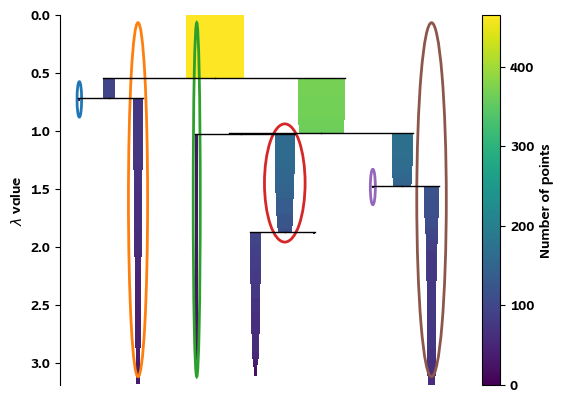

In [950]:
hdbs.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


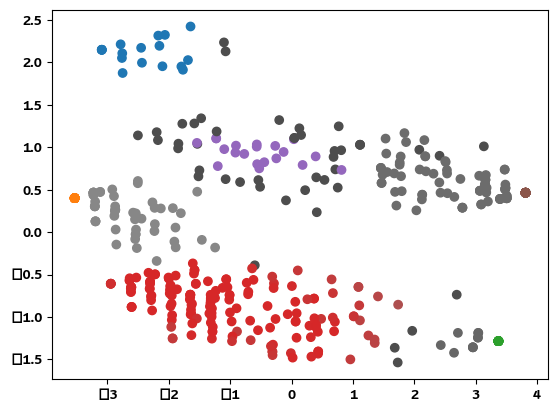

In [951]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(hdbs.labels_, hdbs.probabilities_)]
plt.scatter(pcd[0], pcd[1], c=cluster_colors)

In [952]:
sns.desaturate(palette[1], 0.1)

(0.5747058823529412, 0.5245098039215687, 0.4801960784313726)

### K-means

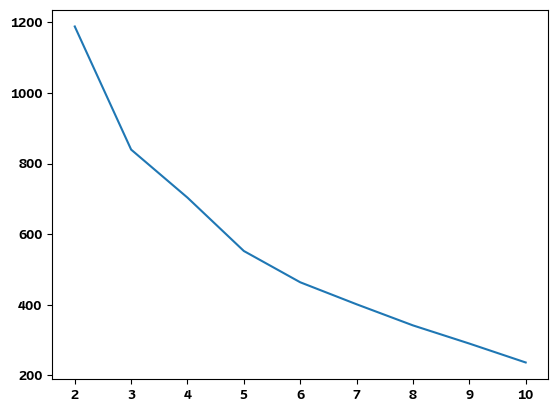

In [132]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc)

In [95]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, random_state=5)

In [96]:
km.fit_transform(pc)
km.labels_

array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 1, 4, 5, 1, 4, 5, 1, 2, 5, 5,
       5, 5, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 7, 5, 7, 5, 1, 5, 1, 1, 1, 1,
       1, 1, 4, 4, 5, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 5, 4, 1, 7, 7, 1, 7,
       1, 5, 4, 4, 4, 4, 5, 0, 3, 4, 1, 5, 1, 4, 5, 4, 2, 5, 4, 4, 5, 5,
       5, 5, 4, 5, 1, 5, 1, 1, 1, 4, 7, 4, 4, 4, 1, 1, 2, 1, 4, 7, 1, 1,
       7, 7, 4, 7, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 7, 1,
       1, 5, 7, 1, 4, 5, 1, 1, 4, 4, 1, 1, 4, 4, 1, 5, 6, 4, 4, 7, 2, 5,
       5, 5, 1, 7, 5, 1, 5, 7, 7, 1, 7, 4, 1, 7, 7, 4, 4, 4, 7, 4, 1, 1,
       1, 4, 1, 5, 4, 4, 5, 5, 7, 7, 1, 5, 3, 2, 3, 3, 1, 1, 1, 5, 7, 5,
       2, 4, 7, 7, 4, 6, 4, 7, 2, 2, 2, 2, 3, 6, 2, 2, 6, 2, 6, 7, 6, 3,
       7, 7, 3, 3, 6, 3, 6, 3, 3, 3, 0, 6, 0, 0, 3, 0, 3, 7, 4, 3, 1, 4,
       1, 1, 4, 1, 1, 4, 4, 5, 4, 4, 7, 4, 1, 4, 1, 1, 1, 1, 1, 7, 4, 1,
       1, 4, 1, 1, 1, 3, 6, 0, 3, 4, 6, 3, 6, 3, 0, 2, 6, 6, 6, 3, 0, 0,
       7, 0, 0, 7, 2, 6, 3, 3, 3, 6, 0, 6, 7, 3, 4,

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


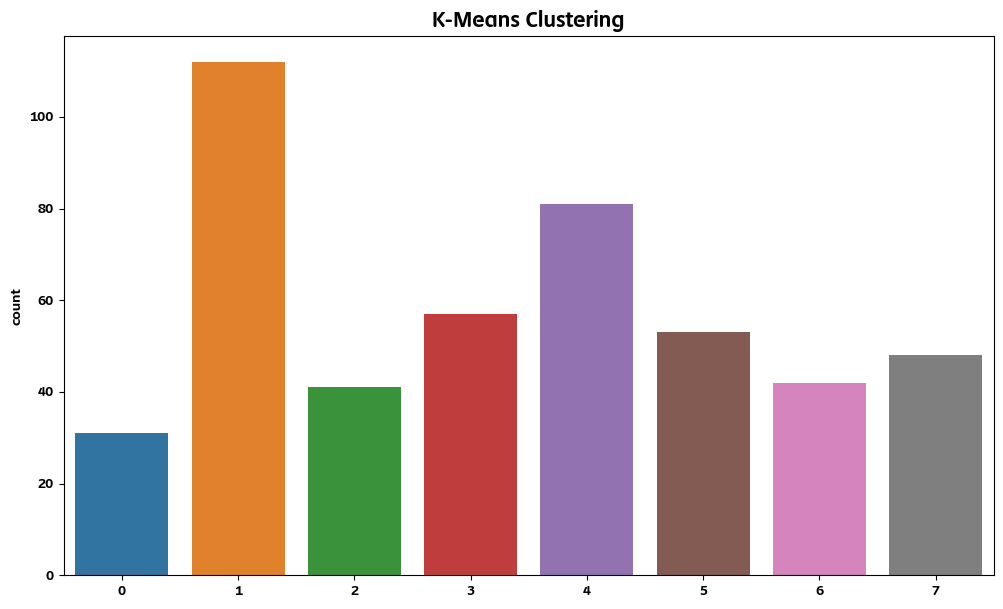

In [97]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc, km.labels_)
score

0.5328142602681124

In [99]:
pcd = pd.DataFrame(pc)
pcd['cluster_id'] = km.labels_
pcd

,0,1,cluster_id
0,-2.815817,0.224472,1
1,-2.477290,0.378667,1
2,-2.795335,0.387534,1
3,-3.116320,0.297931,1
4,-2.788205,0.319707,1
...,...,...,...
460,1.755396,-1.248937,2
461,3.386101,-0.939021,3
462,3.820112,1.680298,0
463,4.103407,2.136345,0


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


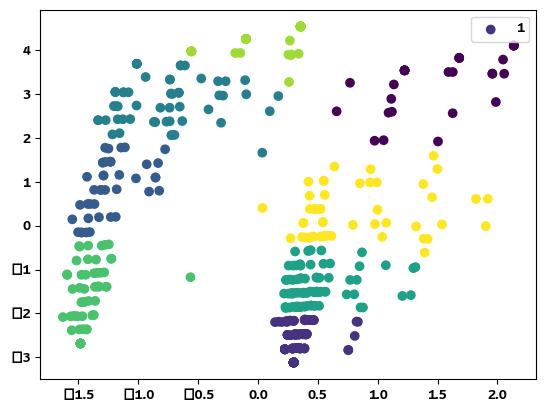

In [100]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'])
plt.legend((pcd['cluster_id']))
plt.show()

In [771]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')ㅌ
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'] , s=10)

SyntaxError: invalid syntax (1347487178.py, line 6)